<a href="https://colab.research.google.com/github/Slkandu/ML/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c)
print(c.numpy())

tf.Tensor(11, shape=(), dtype=int32)
11


In [ ]:
@tf.function
def add(a, b):
    return a + b
def sub(a,b):
  return a-b
a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x,x.numpy()) # Change numpy() to x.numpy() to access the NumPy value of the tensor x

tf.Tensor(10, shape=(), dtype=int32) 10


In [ ]:
a = tf.Variable([[1,2], [3,4]], dtype=tf.float32)
b = tf.Variable([[7,8],[9,10]], dtype=tf.float32)
c = tf.Variable([[11,12],[13,14]], dtype=tf.float32)

y = (a*b) + c
print(y.numpy())

[[18. 28.]
 [40. 54.]]


In [ ]:
y+10

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[28., 38.],
       [50., 64.]], dtype=float32)>

In [ ]:
a = tf.Variable([[[1,2,3],
                 [3,4,4],
                 [5,6,8]],
                [[1,2,3],
                 [3,4,4],
                 [5,6,8]] ],dtype=tf.float32)

a.shape

TensorShape([2, 3, 3])

In [ ]:
a[0][2][1:]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6., 8.], dtype=float32)>

In [ ]:
A = tf.constant([[1,2], [3,4]])
B = tf.constant([[5,6], [7,8]])
C = tf.matmul(A, B)
print(C.numpy())


[[19 22]
 [43 50]]


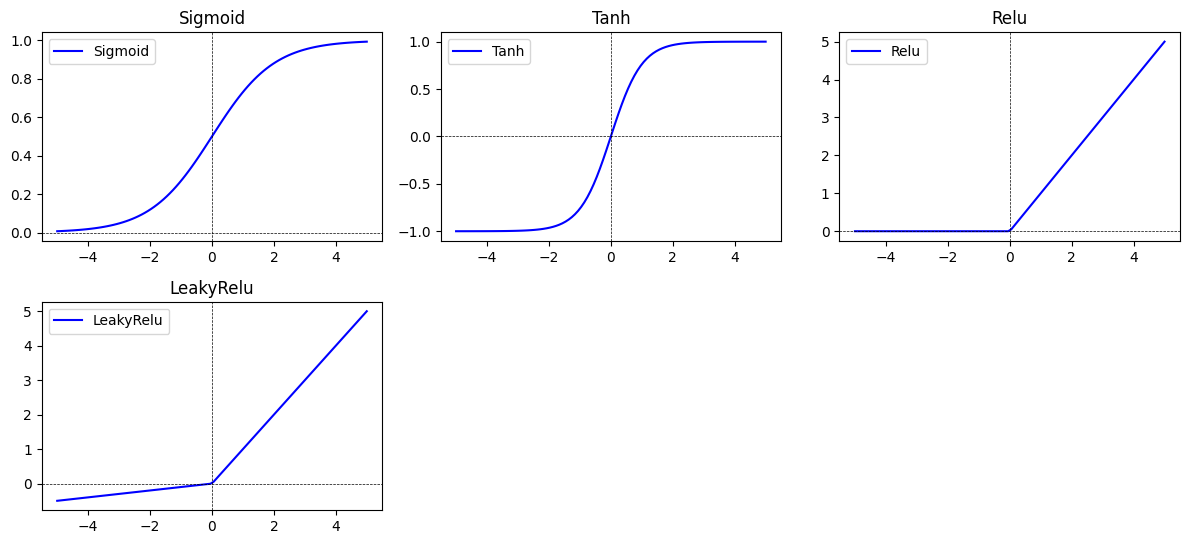

In [ ]:
import matplotlib.pyplot as plt
x= np.linspace(-5,5,100)

#define activations

activations = {
    "Sigmoid":tf.nn.sigmoid(x),
    "Tanh":tf.nn.tanh(x),
    "Relu":tf.nn.relu(x),
    "LeakyRelu":tf.nn.leaky_relu(x, alpha=0.1)
}

plt.figure(figsize=(12,8))
for i, (name,y) in enumerate(activations.items()):
  plt.subplot(3,3,i+1)
  plt.plot(x,y,label = name,color='b')
  plt.title(name)
  plt.axhline(0,color='black',linestyle= '--',linewidth=0.5)
  plt.axvline(0,color='black',linestyle= '--',linewidth=0.5)
  plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#define input range (a set of 3 samples)
x = np.linspace(-3,3,100)
inputs =np.vstack([x,x + 1,x - 1])

#apply softmax to each column
software_outputs = tf.nn.softmax(inputs,axis=0).numpy()

import pandas as pd
df1 = pd.DataFrame(inputs.T)
df2= pd.DataFrame(software_outputs.T)



In [ ]:
df1.head()

,0,1,2
0,-3.000000,-2.000000,-4.000000
1,-2.939394,-1.939394,-3.939394
2,-2.878788,-1.878788,-3.878788
3,-2.818182,-1.818182,-3.818182
4,-2.757576,-1.757576,-3.757576


In [ ]:
df2.head(3)

,0,1,2
0,0.244728,0.665241,0.090031
1,0.244728,0.665241,0.090031
2,0.244728,0.665241,0.090031


f(x): [9. 4. 1. 0. 1. 4. 9.]
df/dx: [-6. -4. -2.  0.  2.  4.  6.]


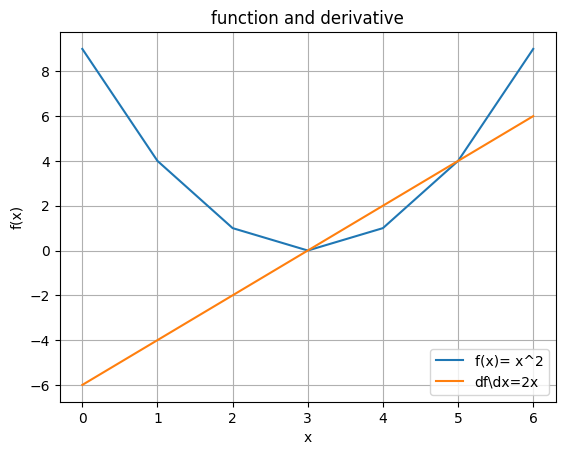

In [ ]:
#define variable x

x= tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])

def f(x):
  return x ** 2

#compute gradients using gradient tape
with tf.GradientTape() as tape:
  y = f(x)

dy_dx = tape.gradient(y, x)
print("f(x):",y.numpy())
print("df/dx:",dy_dx.numpy())

plt.plot(f(x),label='f(x)= x^2')
plt.plot(dy_dx,label='df\dx=2x')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('function and derivative')
plt.grid(True)
plt.show()

f(x): [-64. -30. -12.  -4.   0.   6.  20.]
df/dx: [44. 25. 12.  5.  4.  9. 20.]


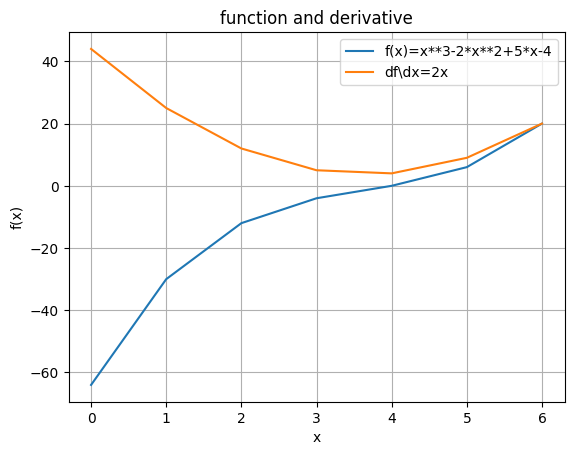

In [ ]:
#define variable x

x= tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])

def f(x):
  return x**3-2*x**2+5*x-4

#compute gradients using gradient tape
with tf.GradientTape() as tape:
  y = f(x)

dy_dx = tape.gradient(y, x)
print("f(x):",y.numpy())
print("df/dx:",dy_dx.numpy())

plt.plot(f(x),label='f(x)=x**3-2*x**2+5*x-4')
plt.plot(dy_dx,label='df\dx=2x')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('function and derivative')
plt.grid(True)
plt.show()


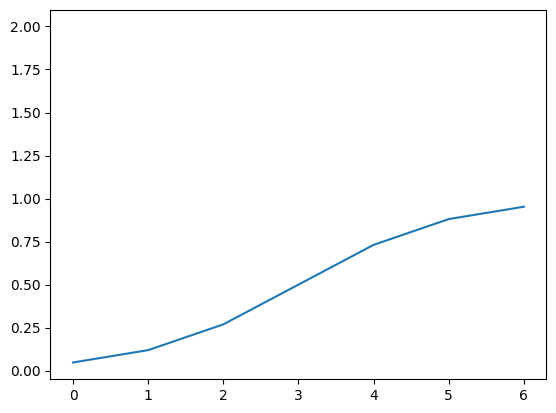

In [ ]:
X= tf.Variable(np.linspace(-10,10,100))

def sig(x):
 return 1/(1+tf.exp(-x))

with tf.GradientTape() as tape:
  y = sig(X)
z= tape.gradient(y,X)

plt.plot(sig(x))
plt.plot(2)

In [ ]:
x = tf.Variable(np.linspace(-5,5,100),dtype=tf.float32)
@tf.function
def sigmoid(x):
  return tf.nn.sigmoid(x)
@tf.function
def relu(x):
  return tf.nn.relu(x)
@tf.function
def tanh(x):
  return tf.nn.tanh(x)
@tf.function
def leaky_relu(x):
  return tf.nn.leaky_relu(x,alpha=0.1)

@tf.function
def compute_gradient(func,x):
  with tf.GradientTape() as tape:
    y = func(x)
  return tape.gradient(y,x)

#compute activation values
activations = {
    "Sigmoid":sigmoid(x),
    "Tanh":tanh(x),
    "Relu":relu(x),
    "LeakyRelu":leaky_relu(x)
}

#compute gradients
gradients = {
    "Sigmoid":compute_gradient(sigmoid,x),
    "Tanh":compute_gradient(tanh,x),
    "Relu":compute_gradient(relu,x),
    "LeakyRelu":compute_gradient(leaky_relu,x)
}

#covert tensorflow tensor to numpy arrays for plotting
x_vals = x.numpy()
activations = {key:value.numpy() for key, value in activations.items()}
gradients = {key:value.numpy() for key, value in gradients.items()}



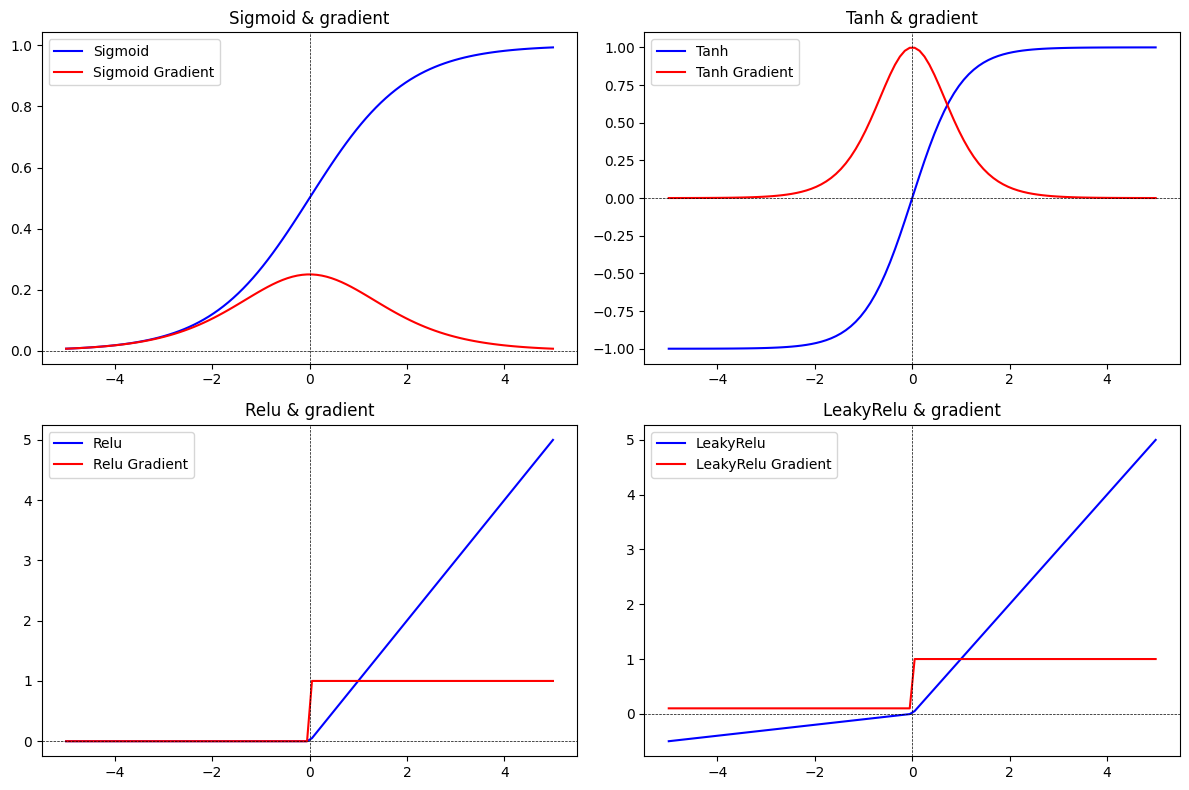

In [ ]:
#plot both activation functions and gradient on same graph
plt.figure(figsize=(12,8))
for i, (name,y) in enumerate(activations.items()):
  plt.subplot(2,2,i+1)
  plt.plot(x_vals,y,label = name,color='b')
  plt.plot(x_vals,gradients[list(gradients.keys())[i]],label=f'{name} Gradient',color='r') # Change gradients.key() to gradients.keys()
  plt.title(f"{name} & gradient")
  plt.axhline(0,color='black',linestyle= '--',linewidth=0.5)
  plt.axvline(0,color='black',linestyle= '--',linewidth=0.5)
  plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
x=tf.Variable(2.0)

@tf.function
def chain_rule_example(x):
  with tf.GradientTape() as tape_outer:
    with tf.GradientTape() as tape_inner:
      y= x**2
      z= tf.sin(y)
    #compute gradients using the chain rule
    dz_dy =tape_inner.gradient(z,y) # Use the inner tape for dz/dy
  dy_dx = tape_outer.gradient(y,x) # Use the outer tape for dy/dx
  dz_dx = dz_dy * dy_dx

  return z,dz_dx

z_value,dz_dx_value =chain_rule_example(x)

print(f"z=sin(x^2)at x=2:{z_value}")
print(f"dz/dx using chain rule:{dz_dx_value.numpy()}") # Add .numpy() to get the NumPy value

z=sin(x^2)at x=2:-0.756802499294281
dz/dx using chain rule:-2.614574432373047


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,BatchNormalization,Dropout

Iris = load_iris()


In [ ]:
Iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
x= Iris.data
y1= Iris.target

In [ ]:
x= Iris.data
y= Iris.target.reshape(-1,1)

In [ ]:
# one hot encoded labels

encoder= OneHotEncoder(sparse_output=False) # sparse means it give 3 columns
y_encoded= encoder.fit_transform(y)

In [ ]:
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [ ]:
#standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# build the single layer perception model
model = Sequential([
    Dense(3,input_shape=(4,),activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model using categorical class entropy for multiclass classification
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the model with validation data
history = model.fit(x_train,y_train,epochs=10,verbose=1,validation_split=(0.2))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.7500 - loss: 0.7940 - val_accuracy: 0.7083 - val_loss: 0.7542
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8008 - loss: 0.6661 - val_accuracy: 0.7083 - val_loss: 0.6944
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7878 - loss: 0.6336 - val_accuracy: 0.7083 - val_loss: 0.6522
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7839 - loss: 0.6071 - val_accuracy: 0.7083 - val_loss: 0.6203
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8021 - loss: 0.5740 - val_accuracy: 0.7500 - val_loss: 0.5948
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8451 - loss: 0.5120 - val_accuracy: 0.7500 - val_loss: 0.5743
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8203 - loss: 0.4969 - val_accuracy: 0.7917 - val_loss: 0.5568
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8424 - loss: 0.4734 - val_accuracy: 0.7917 - val_loss: 0.5419

In [ ]:
#evaluate the model accuracy
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=1)

print(f'\nTest accuracy:, {test_acc:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9333 - loss: 0.4065

Test accuracy:, 0.9333


In [ ]:
#make predictions
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [ ]:
predicted_classes= np.argmax(predictions,axis=1)

In [ ]:
actual_classes= np.argmax(y_test,axis=1)

In [ ]:
#print predictions
print(f'\npredictions vs Actual Labels:')
# Get actual classes from y_test
actual_classes = np.argmax(y_test, axis=1)
for i in range(3):
  print(f'Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}')


predictions vs Actual Labels:
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2


In [ ]:
# generate classification report
from sklearn.metrics import classification_report
report = classification_report(predicted_classes,actual_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



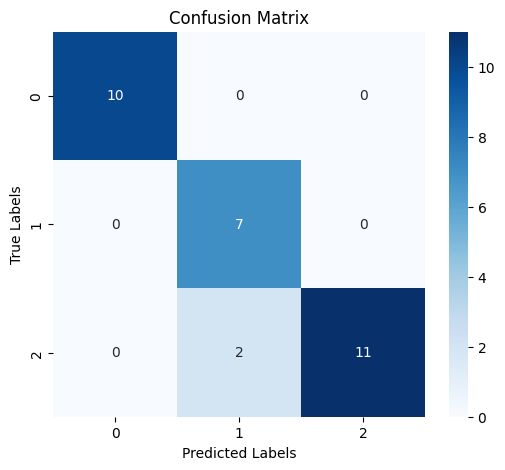

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(predicted_classes,actual_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

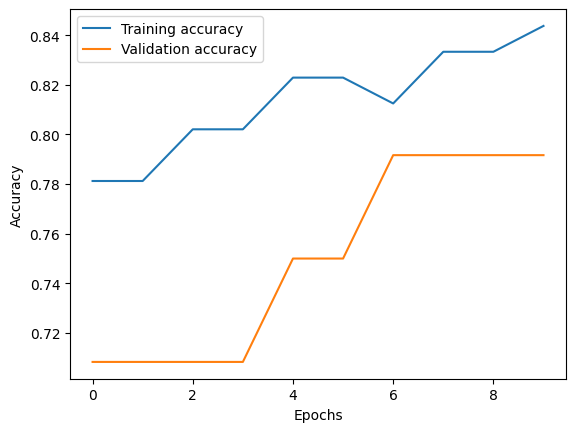

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# build the single layer perception model
model = Sequential([
    Dense(8,input_shape=(4,),activation='relu'),
     Dense(3,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model using categorical class entropy for multiclass classification
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train the model with validation data
history = model.fit(x_train,y_train,epochs=10,verbose=1,validation_split=(0.2))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.4062 - loss: 0.9942 - val_accuracy: 0.5833 - val_loss: 0.8724
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6445 - loss: 0.8874 - val_accuracy: 0.7500 - val_loss: 0.8090
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7878 - loss: 0.8177 - val_accuracy: 0.7917 - val_loss: 0.7561
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7682 - loss: 0.7589 - val_accuracy: 0.8333 - val_loss: 0.7082
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8372 - loss: 0.7079 - val_accuracy: 0.7917 - val_loss: 0.6631
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7956 - loss: 0.6564 - val_accuracy: 0.7917 - val_loss: 0.6233
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8112 - loss: 0.6056 - val_accuracy: 0.7917 - val_loss: 0.5889
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8190 - loss: 0.5684 - val_accuracy: 0.7917 - val_loss: 0.5595

In [ ]:
#evaluate the model accuracy
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=1)

print(f'\nTest accuracy:, {test_acc:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9000 - loss: 0.4472

Test accuracy:, 0.9000


In [ ]:
predicted_classes= np.argmax(predictions,axis=1)
actual_classes= np.argmax(y_test,axis=1)

In [ ]:
#print predictions
print(f'\npredictions vs Actual Labels:')
# Get actual classes from y_test
actual_classes = np.argmax(y_test, axis=1)
for i in range(3):
  print(f'Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}')


predictions vs Actual Labels:
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2


In [ ]:
# generate classification report
from sklearn.metrics import classification_report
report = classification_report(predicted_classes,actual_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



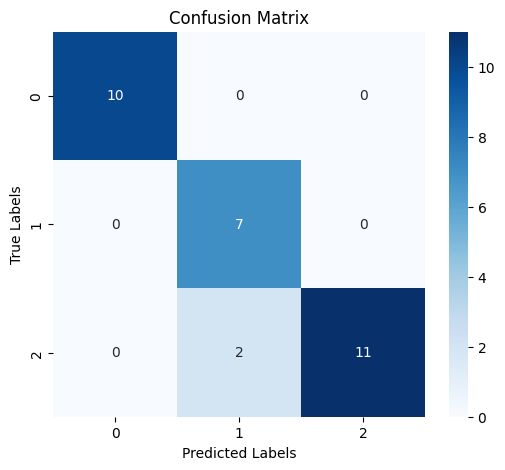

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(predicted_classes,actual_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

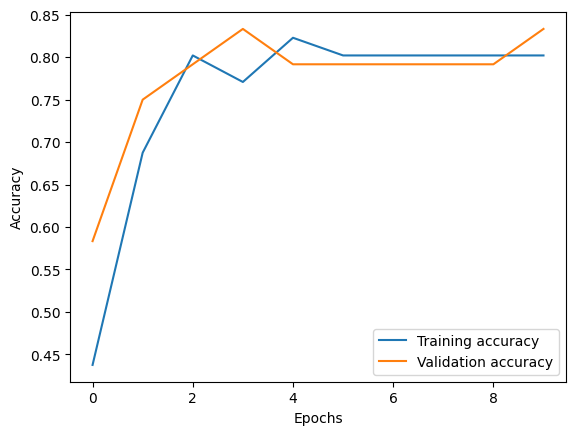

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(8,activation='sigmoid')) # Changed 'Sigmoid' to 'sigmoid'
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05))

history= model.fit(x_train,y_train,epochs=50,verbose=1,validation_data=((x_test,y_test)))

test_loss, test_acc = model.evaluate(x_test,y_test,verbose=1)

print(f'\nTest accuracy:, {test_acc:.4f}')


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.3196 - loss: 1.8214 - val_accuracy: 0.3667 - val_loss: 1.0448
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4815 - loss: 1.0163 - val_accuracy: 0.6333 - val_loss: 0.9095
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6652 - loss: 0.8562 - val_accuracy: 0.6333 - val_loss: 0.7758
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6467 - loss: 0.7410 - val_accuracy: 0.7667 - val_loss: 0.5868
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8144 - loss: 0.5926 - val_accuracy: 0.8000 - val_loss: 0.4891
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7458 - loss: 0.5326 - val_accuracy: 0.7333 - val_loss: 0.4512
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7171 - loss: 0.4808 - val_accuracy: 0.8333 - val_loss: 0.4185
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8340 - loss: 0.4435 - val_accuracy: 0.9333 - val_loss: 0.4021


In [ ]:
model = Sequential([
    Input(shape=(4,)),
    Dense(32,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dense(3,activation='softmax')
])

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05))

history= model.fit(x_train,y_train,epochs=50,batch_size=8,validation_split=0.2)

test_loss,test_acc = model.evaluate(x_test,y_test,verbose=1)

print(f'\nTest accuracy:, {test_acc:.4f}')



Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5491 - loss: 0.7934 - val_accuracy: 0.5000 - val_loss: 1.8911
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6709 - loss: 0.9803 - val_accuracy: 0.7083 - val_loss: 0.4489
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6513 - loss: 0.7344 - val_accuracy: 0.5833 - val_loss: 1.8445
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7902 - loss: 0.4328 - val_accuracy: 0.7083 - val_loss: 0.5909
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8251 - loss: 0.4511 - val_accuracy: 0.7083 - val_loss: 0.5459
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7766 - loss: 0.4377 - val_accuracy: 0.7500 - val_loss: 0.4219
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8700 - loss: 0.3891 - val_accuracy: 0.7083 - val_loss: 0.8145
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8161 - loss: 0.3601 - val_accuracy: 0.7500 - v

In [ ]:
#save the train model
model.save('iris_model.h5')
print('\nModel saved successfully!')


Model saved successfully!


In [ ]:
!pip install streamlit pyngrok

In [ ]:
streamlit_code = """

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the saved model
model = load_model('iris_model.h5')

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Fit the scaler on the whole dataset ONCE
scaler = StandardScaler()
scaler.fit(X)

# Function to make predictions
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data_scaled = scaler.transform(input_data)  # Use transform, not fit_transform
    prediction = model.predict(input_data_scaled)
    predicted_class = np.argmax(prediction)
    return predicted_class, prediction

# Streamlit app
st.title("Iris Flower Classification App")

# Input form
st.header("Enter Iris Features:")
sepal_length = st.number_input("Sepal Length (cm)", step=0.5, value=5.0)
sepal_width = st.number_input("Sepal Width (cm)", step=0.5, value=3.0)
petal_length = st.number_input("Petal Length (cm)", step=0.5, value=1.0)
petal_width = st.number_input("Petal Width (cm)", step=0.5, value=0.5)

if st.button("Predict"):
    predicted_class, prediction = predict_iris(
        sepal_length, sepal_width, petal_length, petal_width
    )
    iris_classes = ["Setosa", "Versicolor", "Virginica"]
    st.write(f"Predicted Iris Class: **{iris_classes[predicted_class]}**")

    # Display probabilities
    st.write("Prediction Probabilities:")
    st.write(
        pd.DataFrame(
            {"Class": iris_classes, "Probability": prediction[0]},
            index=range(1, 4),
        )
    )
"""

with open ('app.py', 'w') as f:
  f.write(streamlit_code)

In [ ]:
!streamlit run app.py &>/content/logs.txt&

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqLoi8PEUwFwKXKvA34olLQSBE_2mrXjJS7huArcoMqiZaf6")

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect('8501')
print(f"sreamlit App is live at:{public_url}")

sreamlit App is live at:NgrokTunnel: "https://3247-35-224-208-192.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
x = np.random.rand(200, 1) * 10
# Use 'x' instead of 'X' to calculate 'y'
y = 3 * x + np.random.rand(200, 1) * 2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, )

test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)

print(f'\nTest MAE:, {test_mae:.4f}')

y_pred = model.predict(x_test)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 280.8033 - mae: 14.2223
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.1431 - mae: 5.3463
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.0300 - mae: 2.6692
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0075 - mae: 1.4367
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7435 - mae: 1.1043
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0068 - mae: 0.8185
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6416 - mae: 0.6552
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4352 - mae: 0.5612 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4677 - mae: 0.5910
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4329 - mae: 0.5565 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3713 - mae: 0.5213
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3822 - mae: 0.5104
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste